In [1]:
import nilearn.plotting as plotting
from decouple import config
import matplotlib.pyplot as plt
import numpy as np
import os
import second_level_functions as slf
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning) #Filterout all the nilearn user warnings

Change name of task here then run

In [2]:
task = 'eft'

Define paths, get images and define negative log10 threshold value

In [3]:
threshold_pval = -np.log10(0.05)
path = os.path.join(config(task), '2ndlevel', 'mixed_model')
save_results = os.path.join(config(task), '2ndlevel')
images = slf.get_images(path)
contrasts = slf.contrast_imgs(images['t_stat'], images['pvals'])

Plotting pvalues

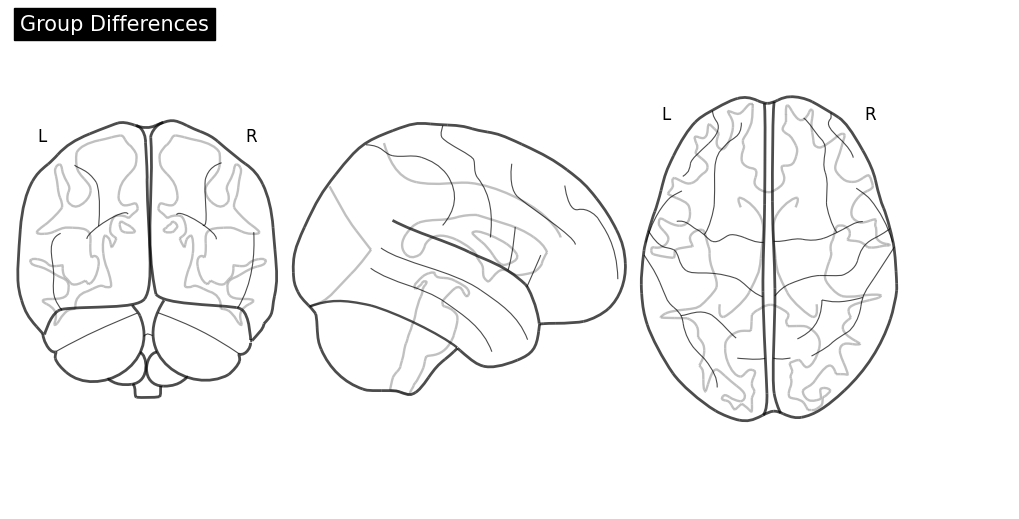

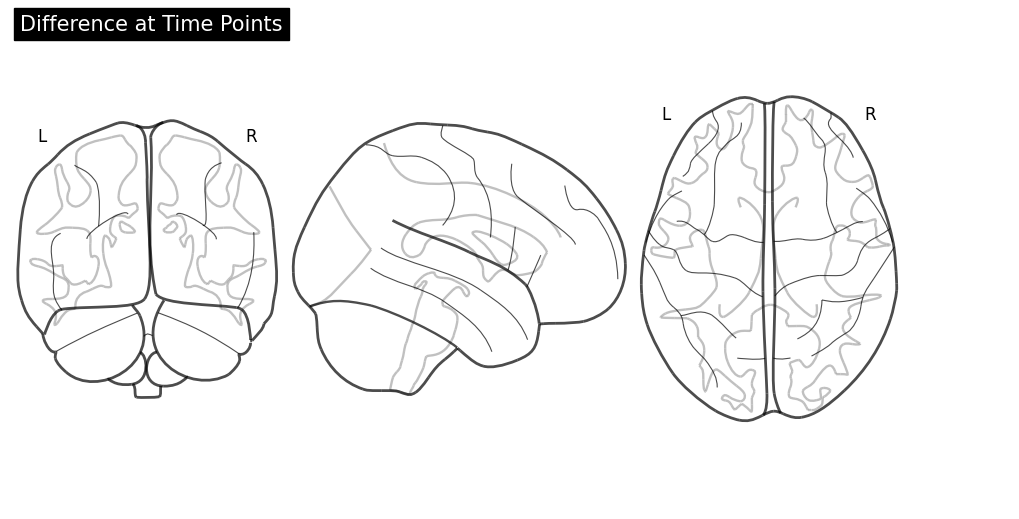

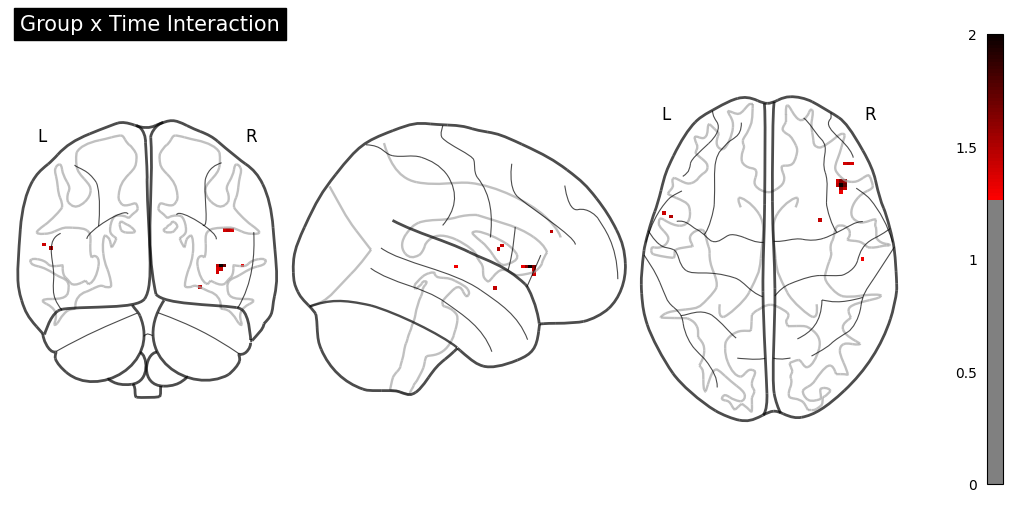

In [4]:
contrasts_list = [contrasts['group'], contrasts['time'], contrasts['interaction']]

for contrast in contrasts_list:
    fig = plt.figure(figsize=(10, 5))
    plotting.plot_glass_brain(contrast['pvals'], colorbar=True, plot_abs=False, 
                              figure=fig, title=contrast['graph_title'], threshold=threshold_pval)

/home/k1812017/envs/neuroimaging/lib/python3.9/site-packages/nilearn/plotting/html_stat_map.py:219: FutureWarning: Default resolution of the MNI template will change from 2mm to 1mm in version 0.10.0
  bg_img = load_mni152_template()



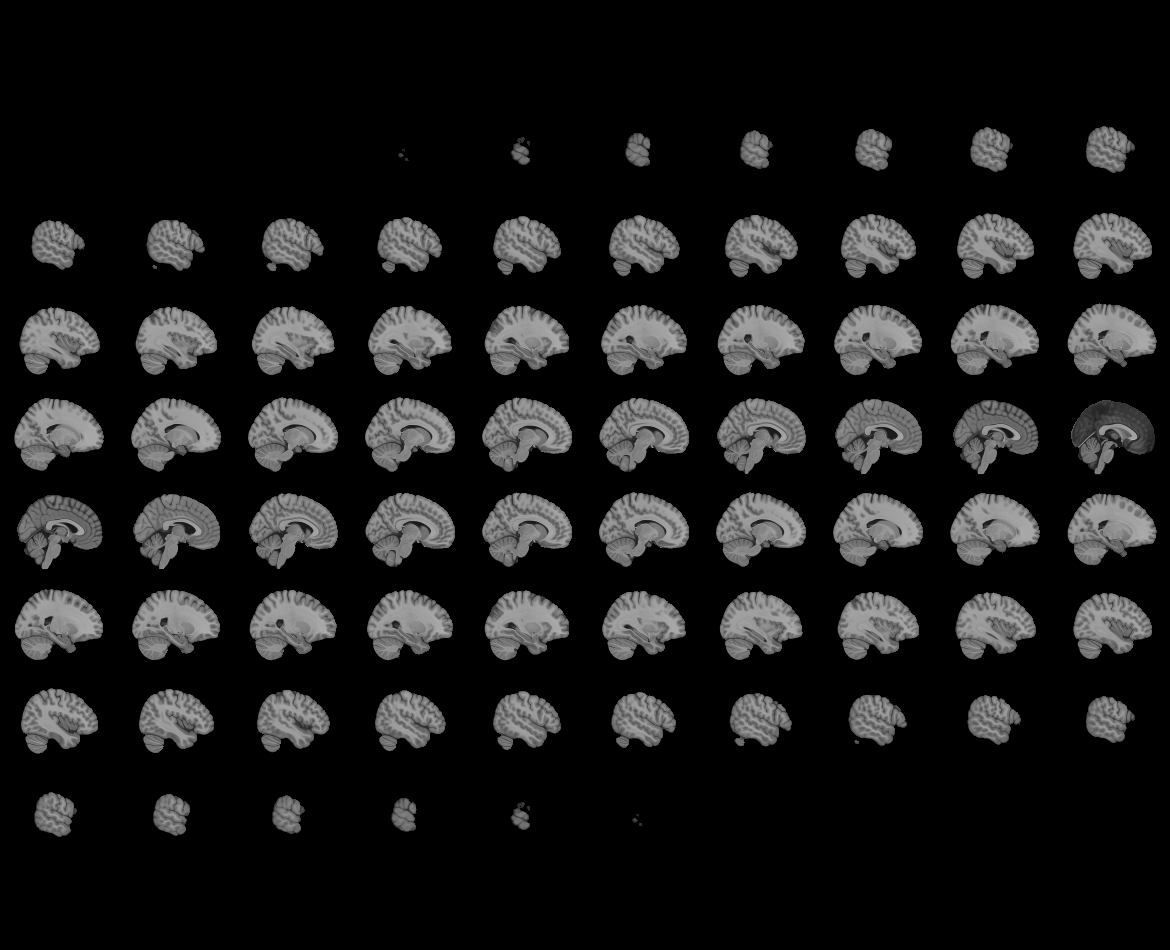
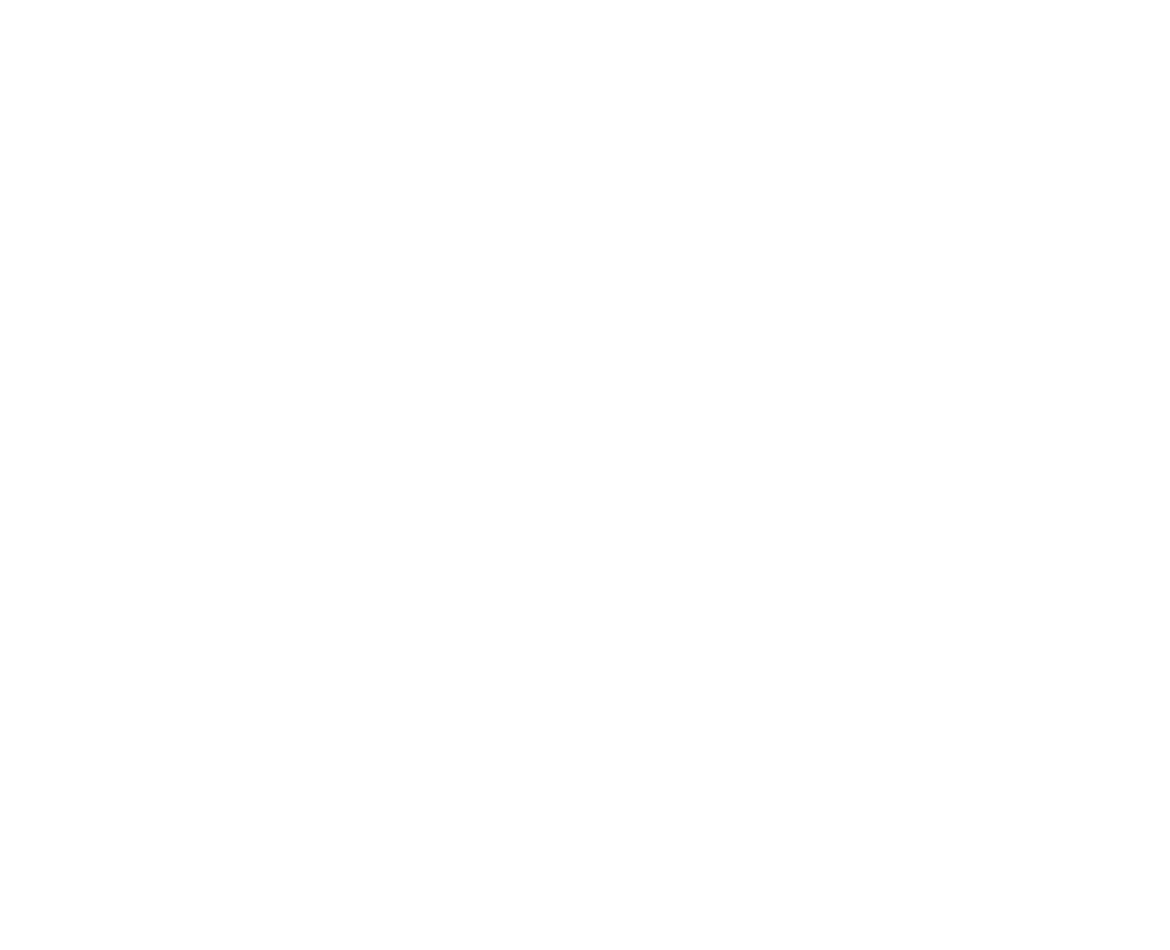

In [5]:
plotting.view_img(contrasts['group']['pvals'], threshold=threshold_pval)


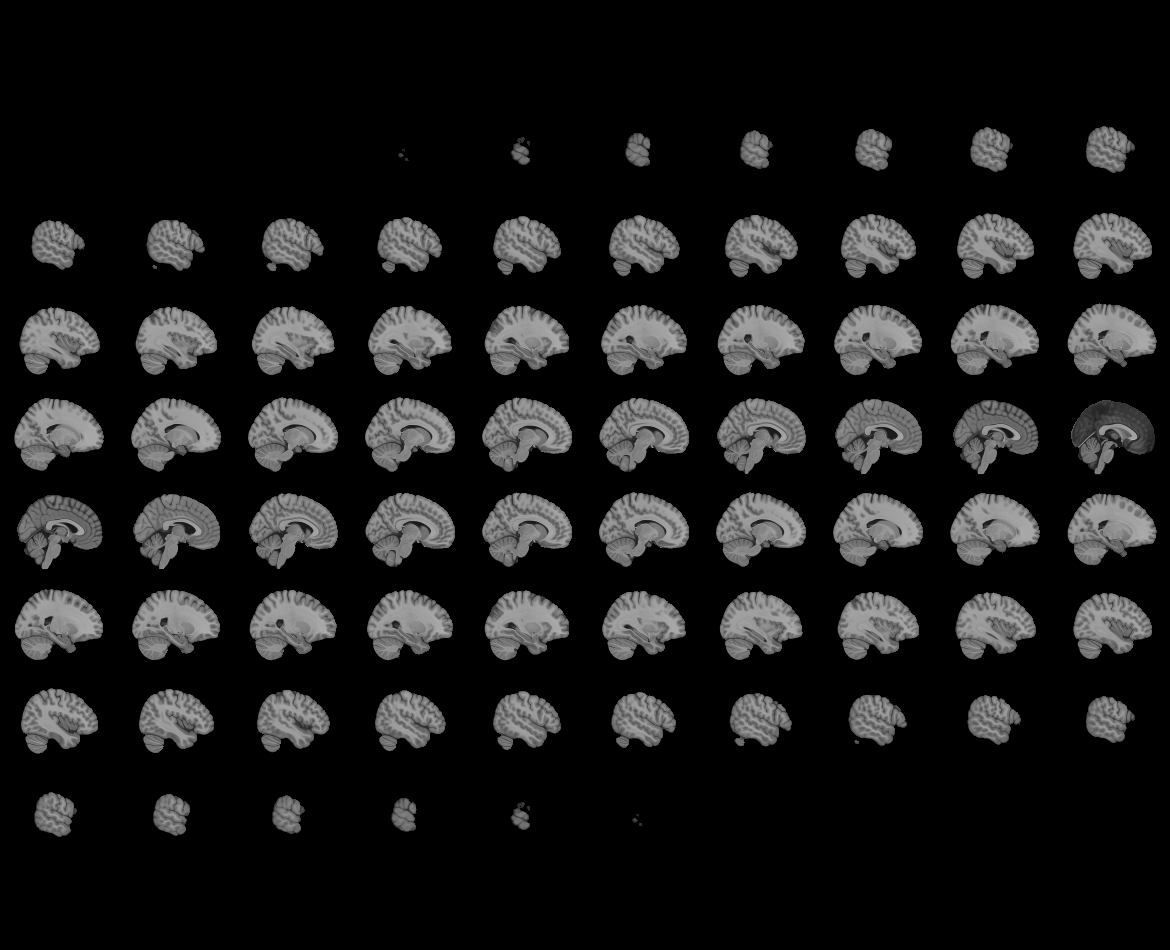
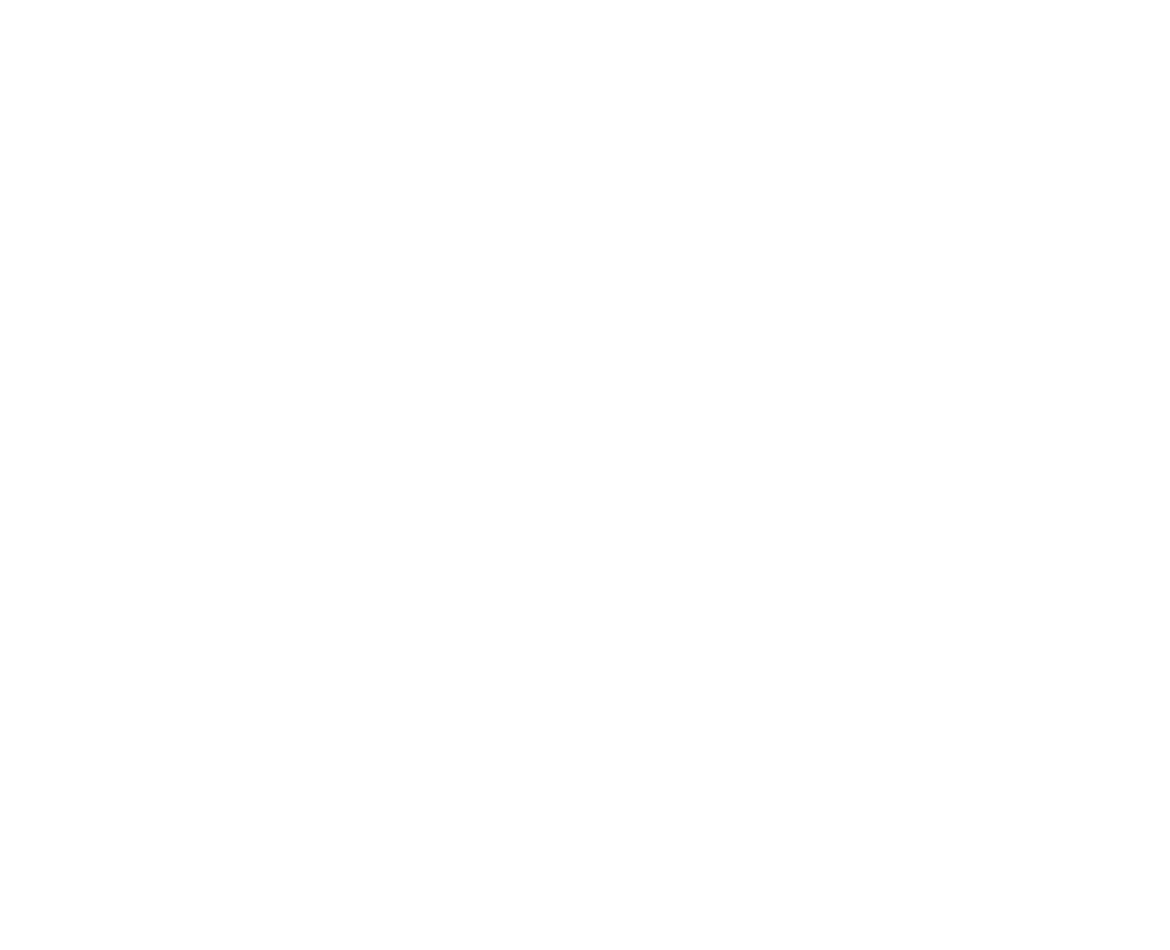

In [6]:
plotting.view_img(contrasts['time']['pvals'], threshold=threshold_pval)


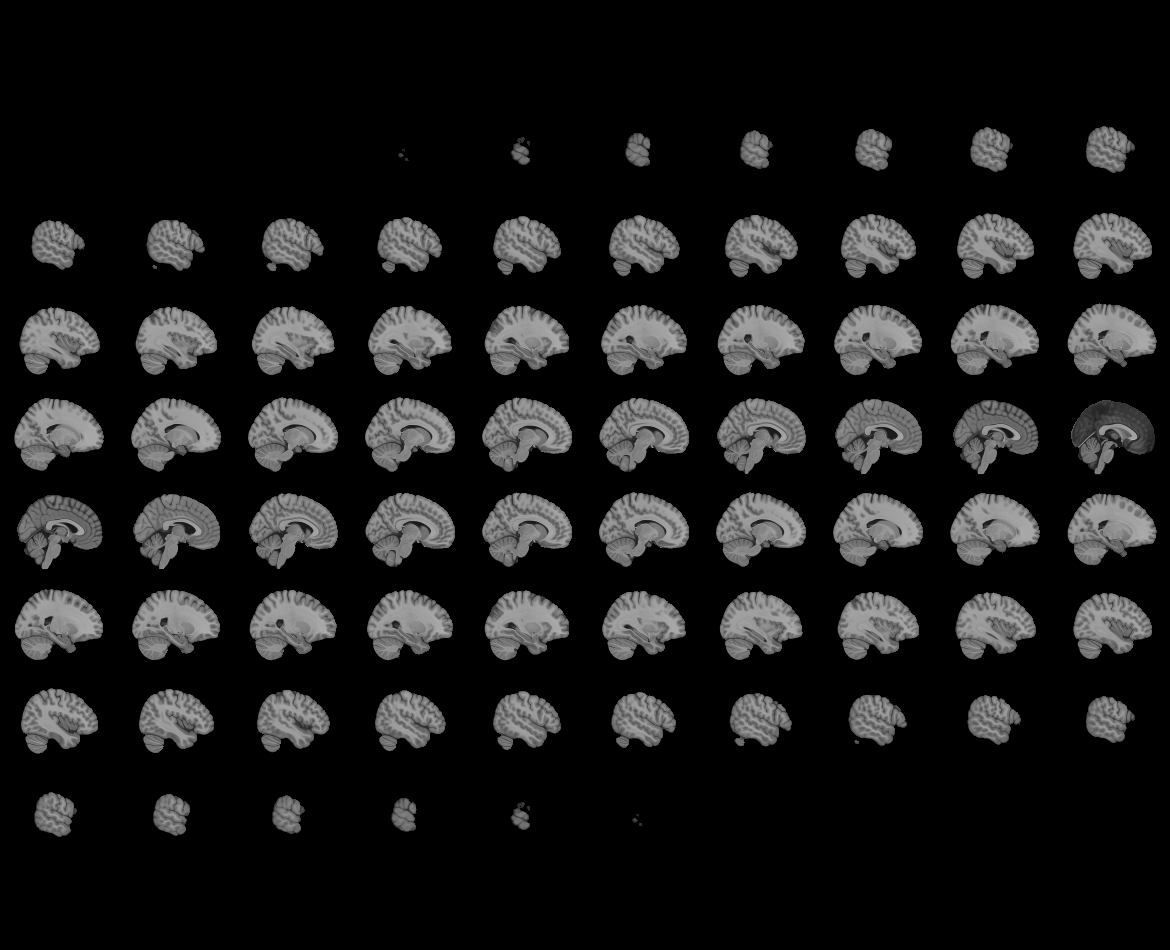
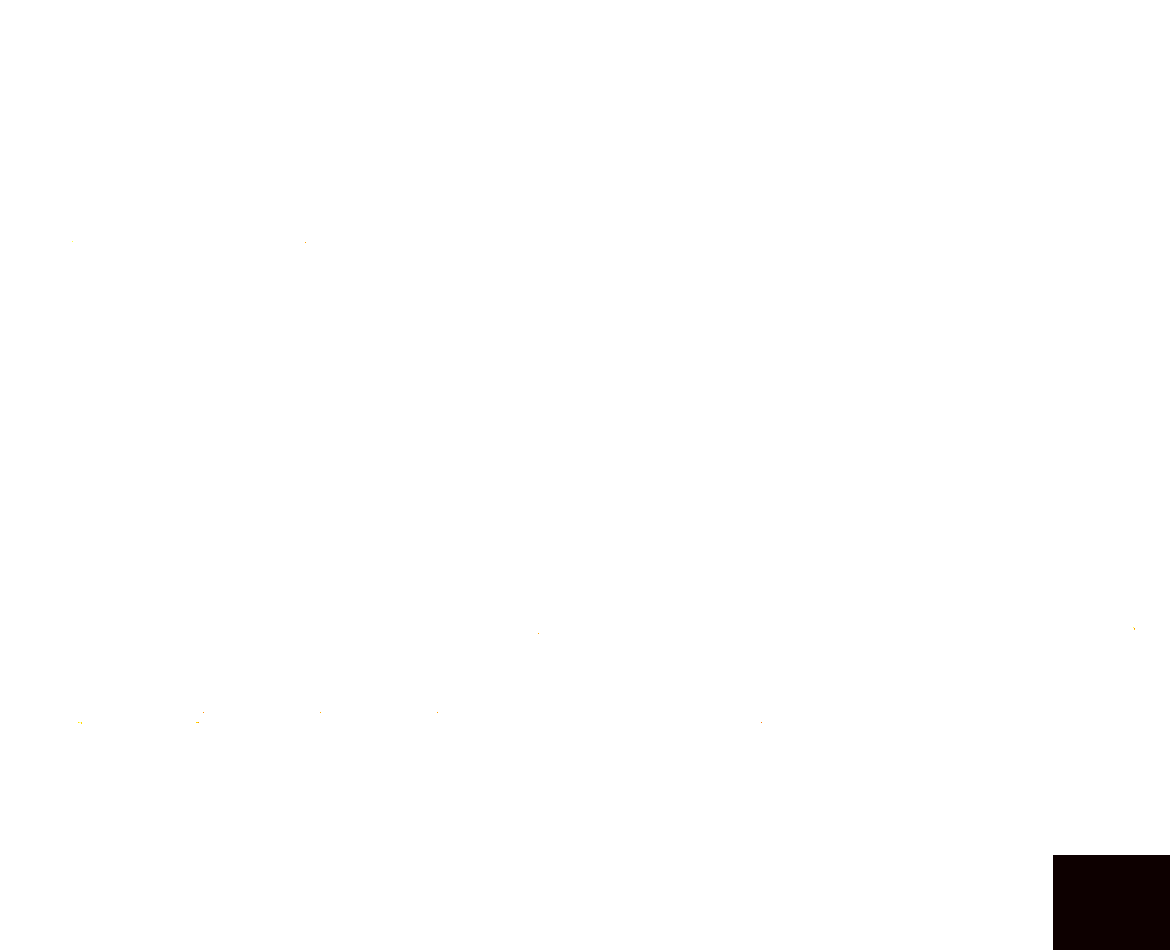

In [7]:
plotting.view_img(contrasts['interaction']['pvals'], threshold=threshold_pval)


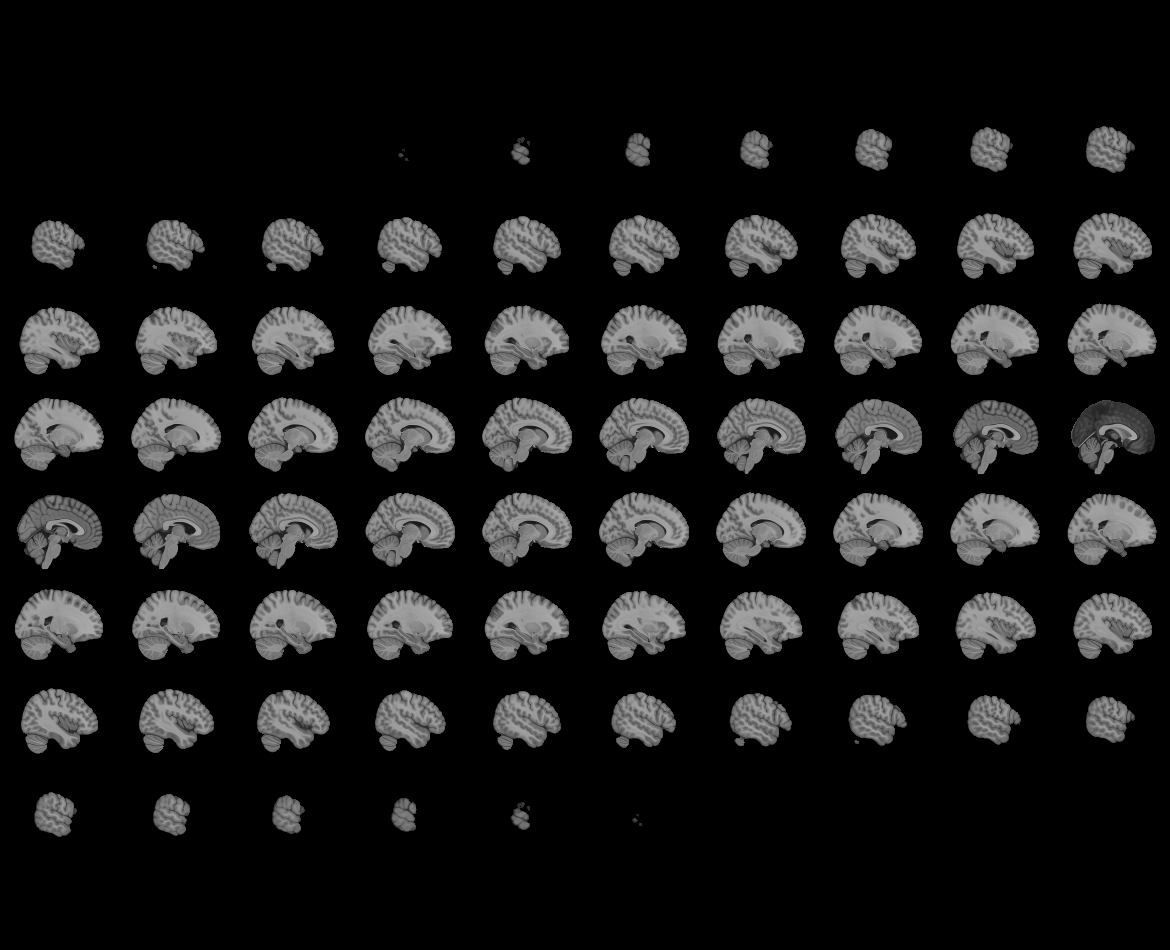
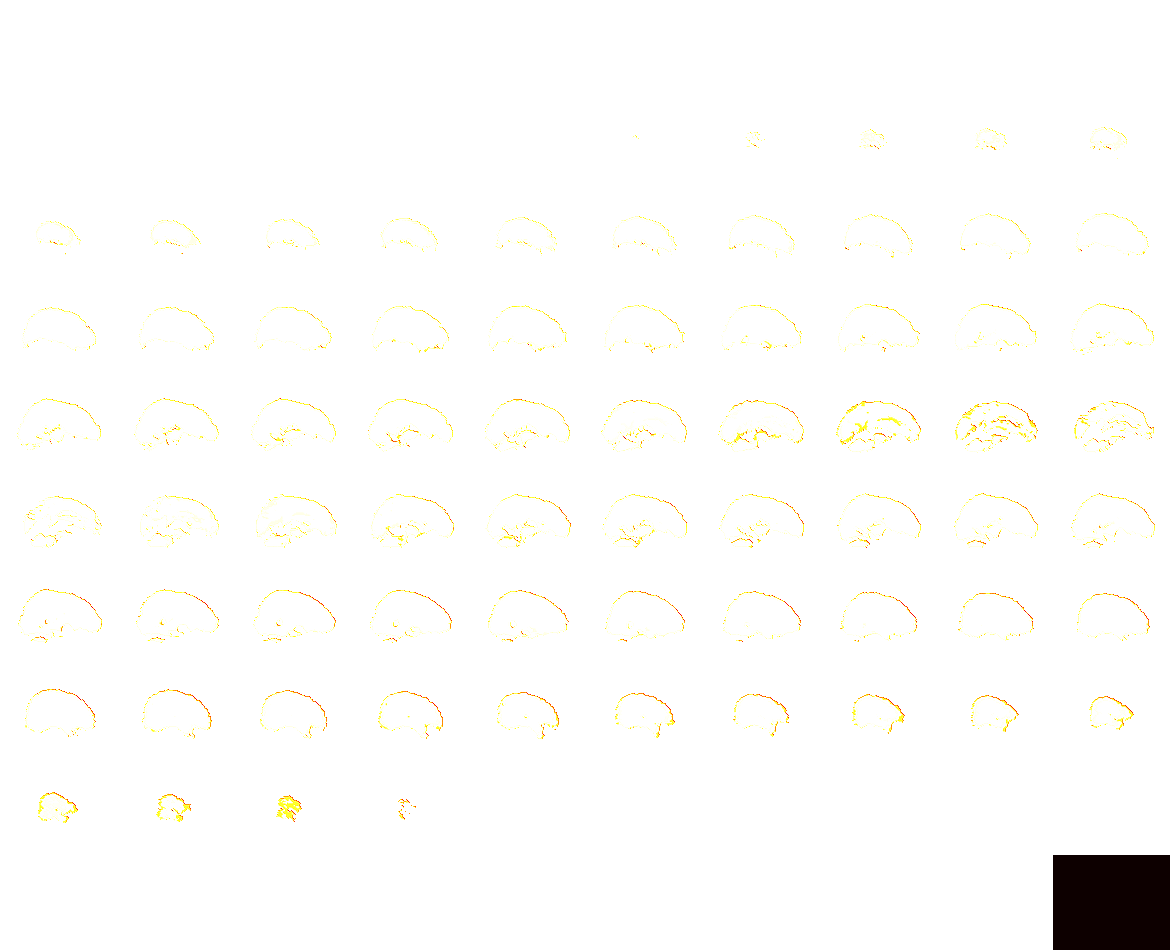

In [8]:
plotting.view_img(images['mask'])

In [9]:
group_clusters = slf.load_cluster_csv(save_results, 'group_clusters.csv')
group_clusters

No Significant Clusters


In [10]:
time_clusters = slf.load_cluster_csv(save_results, 'time_clusters.csv')
time_clusters

No Significant Clusters


In [11]:
interaction_clusters = slf.load_cluster_csv(save_results, 'interaction_clusters.csv')
interaction_clusters

,cluster_id,peak_x,peak_y,peak_z,volume_mm,log10p,pval,harvard_oxford,aal,desikan_killiany
0,1,41.5,25.5,1.5,88,1.55059,0.028146,72.73% Right_Frontal_Operculum_Cortex; 27.27% ...,63.64% Frontal_Inf_Tri_R; 27.27% Insula_R; 9.0...,72.73% Unknown; 27.27% ctx-rh-parstriangularis
1,2,45.5,37.5,21.5,24,1.41844,0.038156,100.00% Right_Frontal_Pole,100.00% Frontal_Mid_2_R,66.67% ctx-rh-rostralmiddlefrontal; 33.33% Rig...
2,3,53.5,-16.5,1.5,8,1.30873,0.049121,100.00% Right_Planum_Temporale,100.00% Temporal_Sup_R,100.00% Right-Cerebral-White-Matter
3,4,29.5,5.5,-10.5,8,1.45312,0.035227,100.00% Right_Putamen,100.00% Putamen_R,100.00% Right-Putamen
4,5,-54.5,7.5,11.5,8,1.49515,0.031978,100.00% Left_Precentral_Gyrus,100.00% Frontal_Inf_Oper_L,100.00% ctx-lh-precentral
5,6,-58.5,9.5,13.5,8,1.42741,0.037376,100.00% Left_Precentral_Gyrus,100.00% Frontal_Inf_Oper_L,100.00% ctx-lh-precentral
